# Question Q6

*Question*: When your organization develops an ML-enabled system, to what degree would you judge that the solutions are “sub-optimally” developed in terms of requiring rework and/or making maintenance over time harder than it could be?

*Answer Type*: Likert Option

*Options*: [Never, Rarely, Sometimes, Frequently, Always, I don't know]

### Necessary Libraries

In [1]:
import pandas as pd
from utils.basic import rename_values
from utils.dataframe import DataframeUtils
from utils.plot import PlotUtils
from utils.bootstrapping import BootstrappingUtils

### Dataframe Init

In [2]:
dataframe_obj = DataframeUtils('./data/main_data.csv', ';', './data/unused_columns.txt', './data/formatted_columns.txt')
# the index is not important, but when we internally format df we need to reset index
dataframe_obj.df = dataframe_obj.df.reset_index(drop=True)

### Basic Analysis

In [3]:
dataframe_obj.df['Q6_ML_Solution_Optimality'].head()

0    Frequently
1         Never
2     Sometimes
3     Sometimes
4     Sometimes
Name: Q6_ML_Solution_Optimality, dtype: object

In [4]:
# cleaning data
dataframe_obj.remove_value_from_df('-77','Q6_ML_Solution_Optimality')
dataframe_obj.remove_value_from_df("I don't know",'Q6_ML_Solution_Optimality') # I don't know option is not important

In [5]:
indexes = list(dataframe_obj.df['Q6_ML_Solution_Optimality'].value_counts().index)
values = list(dataframe_obj.df['Q6_ML_Solution_Optimality'].value_counts())

In [6]:
# format order to show on likert
order = [2, 3, 1, 0, 4]
indexes = [indexes[i] for i in order]
values = [values[i] for i in order]

In [7]:
# normalize values - ensuring that the sum don't overflow 100
sum_values = sum(values)
normalized_values = [(float(v)/sum_values)* 100 for v in values]

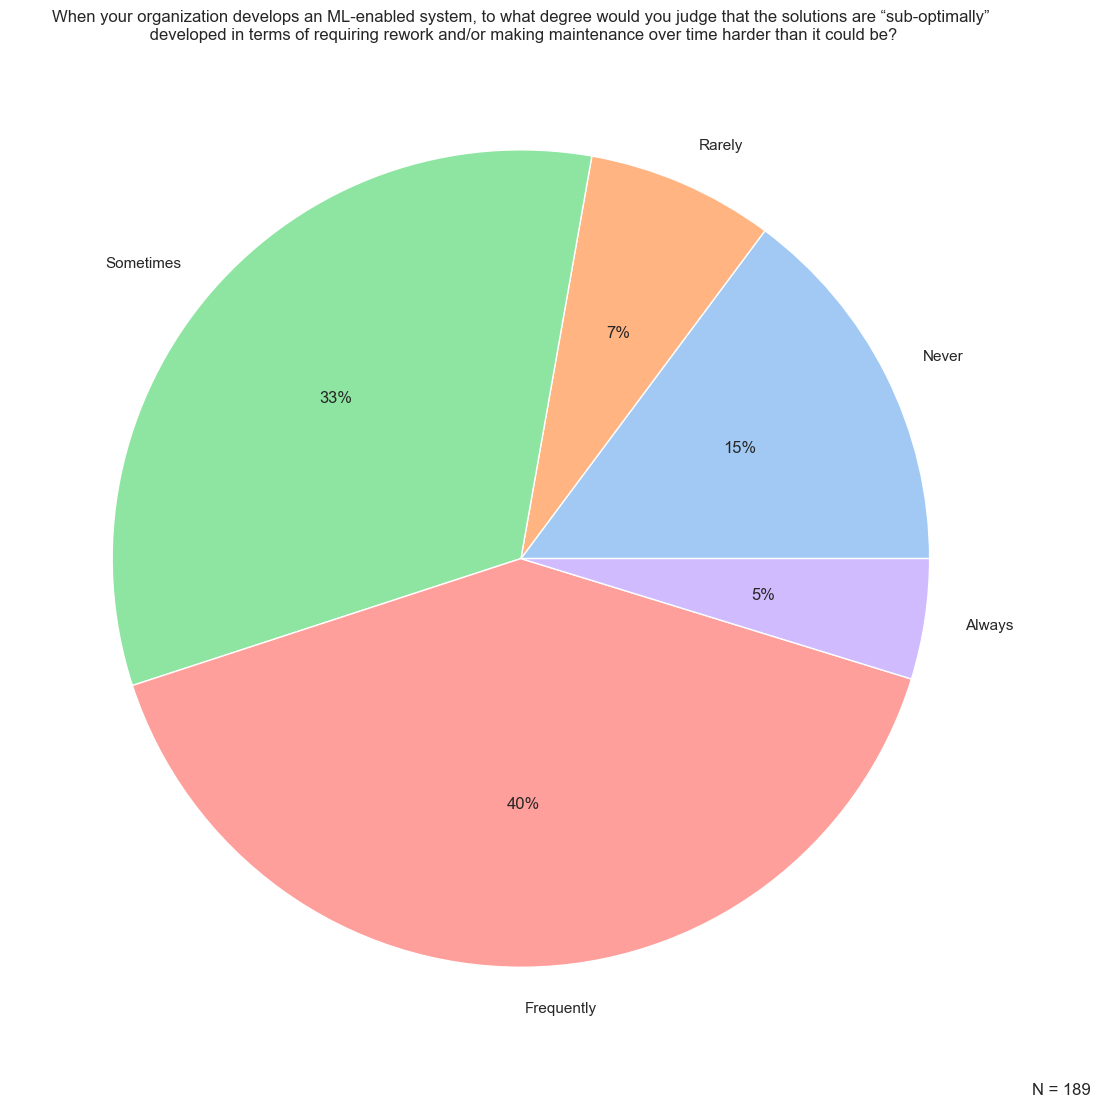

In [8]:
# piechart
q6_plot = PlotUtils(pd.DataFrame(
    data={'Optimality': indexes, 'Answers': normalized_values}
))

# compute total of answer considered in this question
total_answers = "N = " + str(len(dataframe_obj.df['Q6_ML_Solution_Optimality']))

q6_plot.pie_chart(values_column="Answers", labels_column="Optimality", 
                  title="When your organization develops an ML-enabled system, to what degree would you judge that the solutions are “sub-optimally”\n developed in terms of requiring rework and/or making maintenance over time harder than it could be?",
                  total_answers=total_answers)

In [9]:
# likert
q6_plot = PlotUtils(pd.DataFrame(
    data={'Optimality': list(dataframe_obj.df['Q6_ML_Solution_Optimality'])}
))

C:\Users\Antonio Pedro Alves\.virtualenvs\pfp-antonio-pedro-lcinjCty\lib\site-packages\plot_likert\plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)


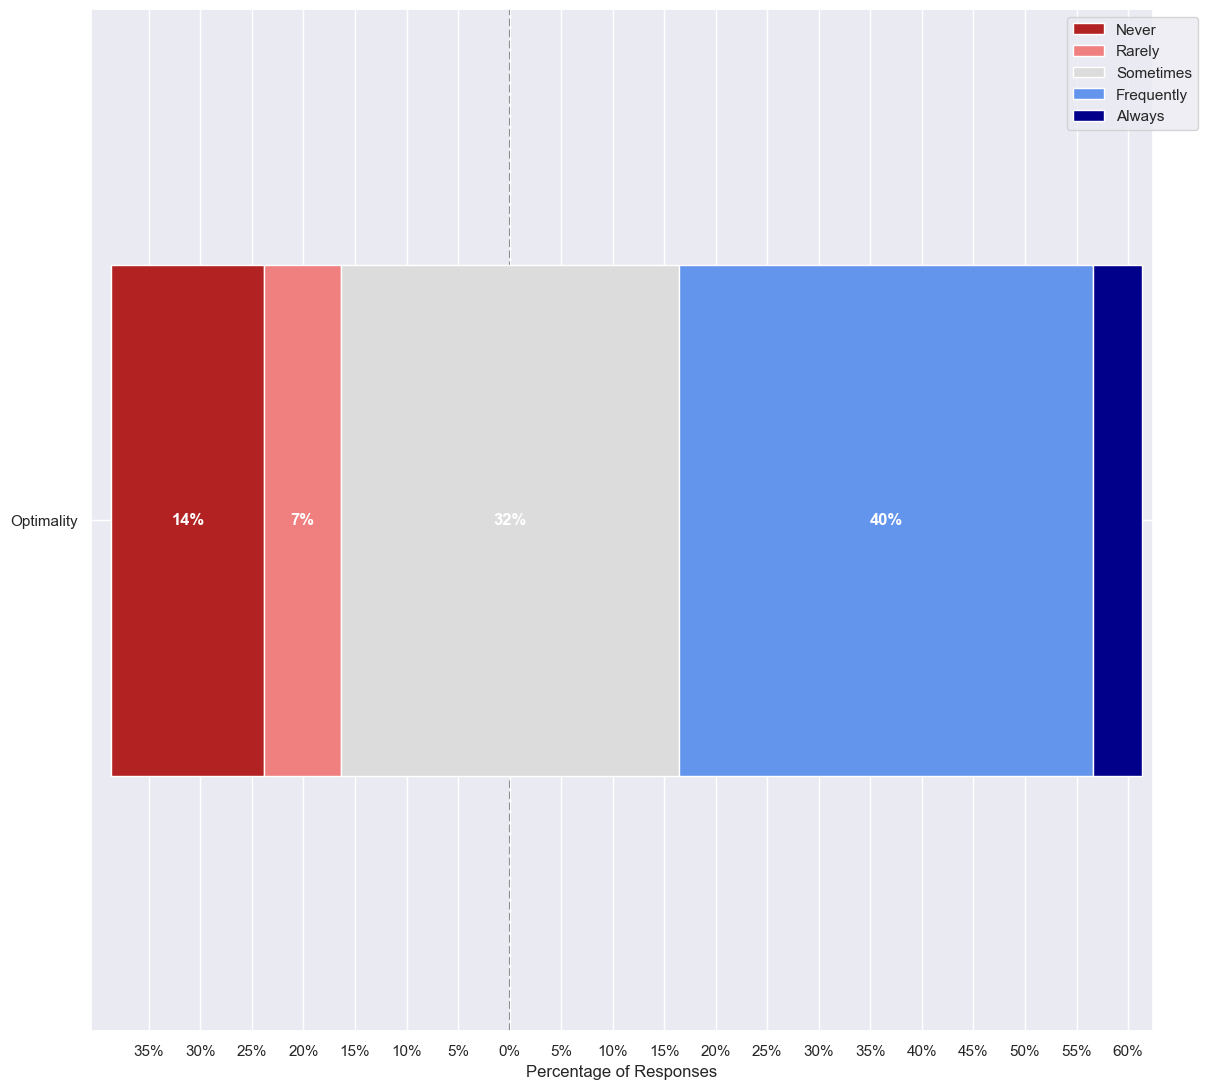

In [10]:
q6_plot.likert(indexes, use_percentage=True, bar_label=True)

C:\Users\Antonio Pedro Alves\.virtualenvs\pfp-antonio-pedro-lcinjCty\lib\site-packages\plot_likert\plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)


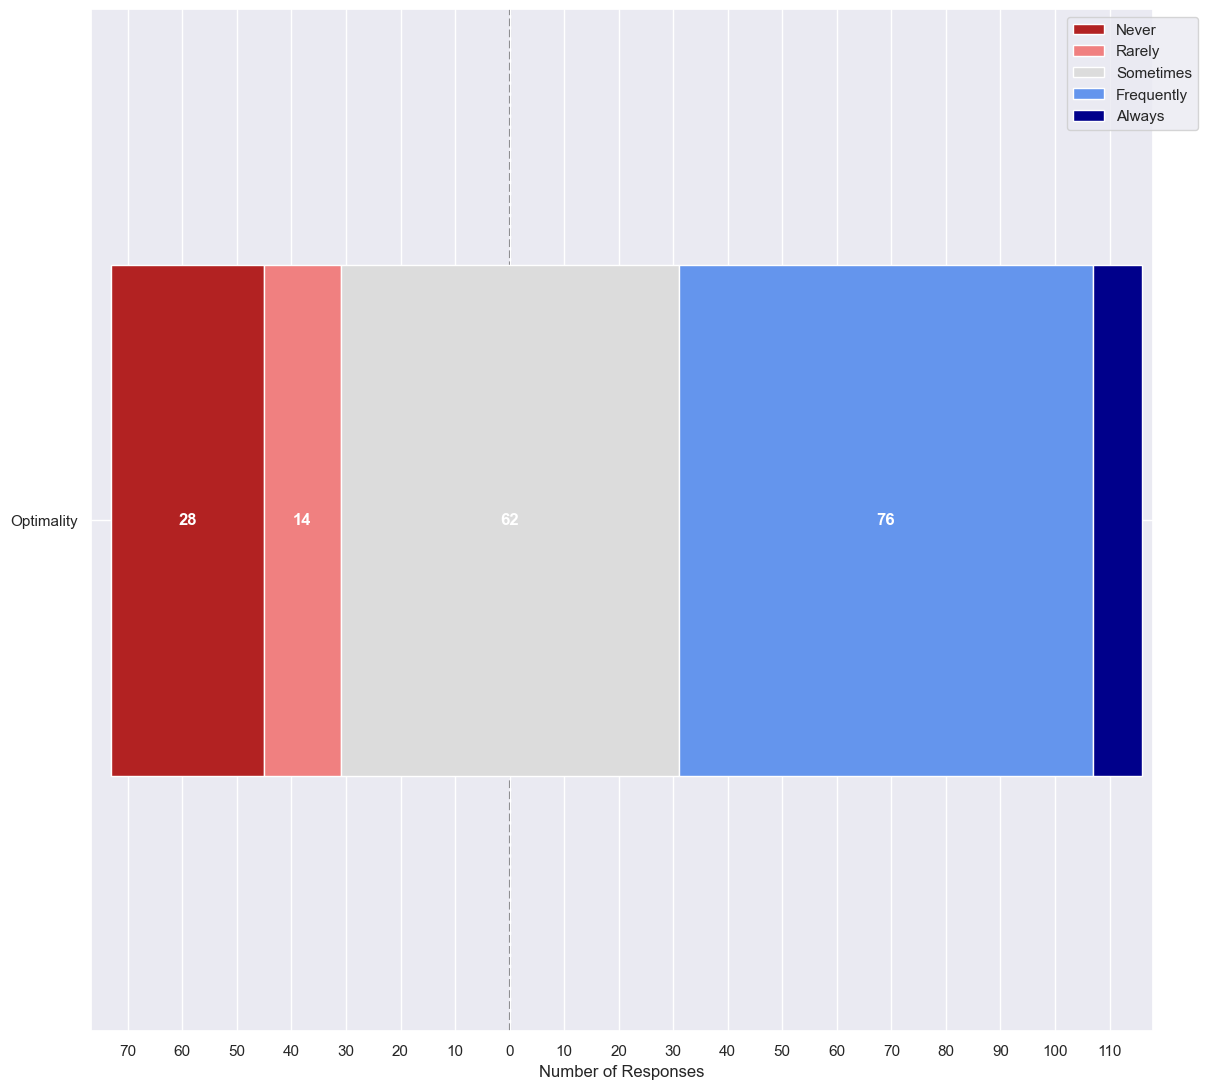

In [11]:
q6_plot.likert(indexes, use_percentage=False, bar_label=True)

### Bootstrapping Analysis

In [12]:
valid_options_list = list(dataframe_obj.df['Q6_ML_Solution_Optimality'].unique())
valid_answers_list = list(dataframe_obj.df['Q6_ML_Solution_Optimality'])

In [13]:
bootstrapping_obj = BootstrappingUtils(valid_answers_list, valid_options_list, 1000, 100, 95)

In [14]:
bootstrapped_dict_data = bootstrapping_obj.bootstrapping()

In [15]:
normalized_bootstrapped_dict_data = {}
for option in bootstrapped_dict_data:
    normalized_value = sum(bootstrapped_dict_data[option]['population']) / 1000
    normalized_bootstrapped_dict_data[option] = normalized_value

In [16]:
labels = list(normalized_bootstrapped_dict_data.keys())
values = list(normalized_bootstrapped_dict_data.values())

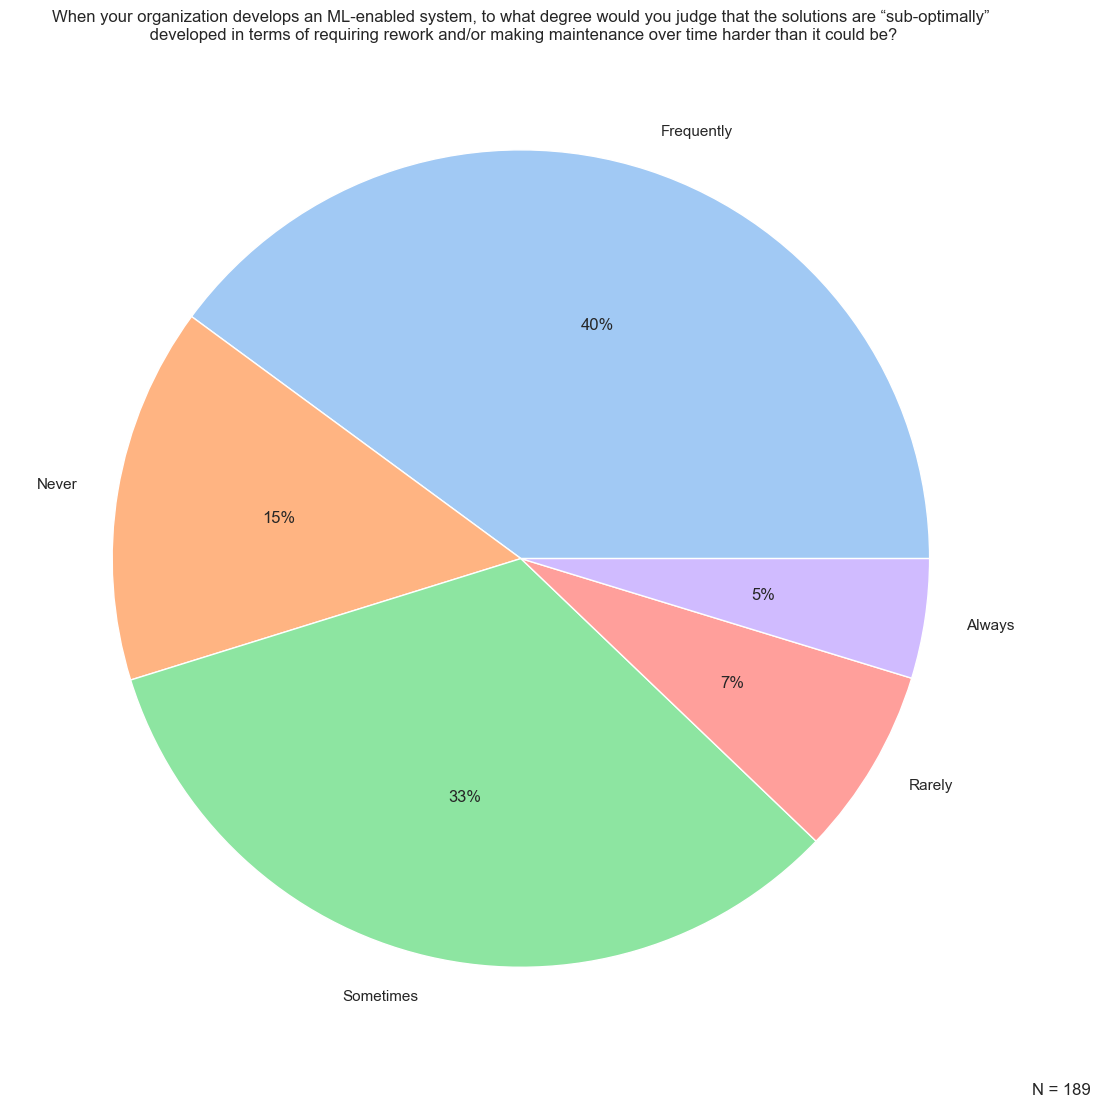

In [17]:
# pie chart
q6_plot = PlotUtils(pd.DataFrame(
    data={'Optimality': labels, 'Answers': values}
))

# compute total of answer considered in this question
total_answers = "N = " + str(len(dataframe_obj.df['Q6_ML_Solution_Optimality']))

q6_plot.pie_chart(values_column="Answers", labels_column="Optimality", 
                  title="When your organization develops an ML-enabled system, to what degree would you judge that the solutions are “sub-optimally”\n developed in terms of requiring rework and/or making maintenance over time harder than it could be?",
                  total_answers=total_answers)

In [18]:
# logical order to likert plot
order = [4, 0, 2, 3, 1]
labels = [labels[i] for i in order]
values = [values[i] for i in order]

In [19]:
# likert data
population_agile_development = []
for label, value in zip(labels, values):
    population_agile_development += [label for _ in range(round( (value * 1000) / 100 ))]

In [20]:
# liker plot
q6_plot = PlotUtils(pd.DataFrame(
    data={'Optimality': population_agile_development}
))

C:\Users\Antonio Pedro Alves\.virtualenvs\pfp-antonio-pedro-lcinjCty\lib\site-packages\plot_likert\plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)


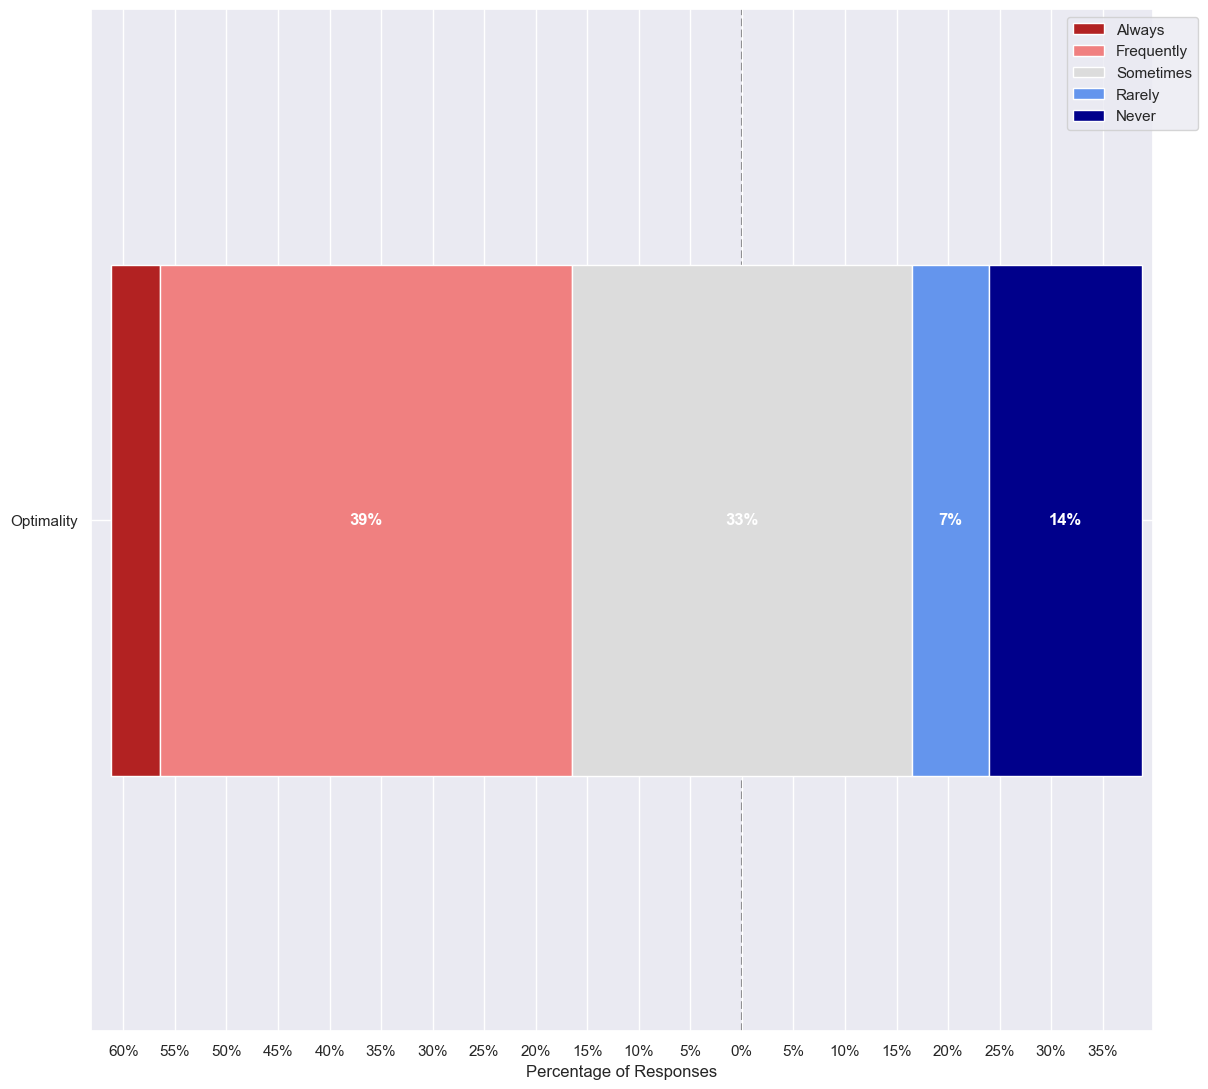

In [21]:
q6_plot.likert(labels, use_percentage=True, bar_label=True)

C:\Users\Antonio Pedro Alves\.virtualenvs\pfp-antonio-pedro-lcinjCty\lib\site-packages\plot_likert\plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)


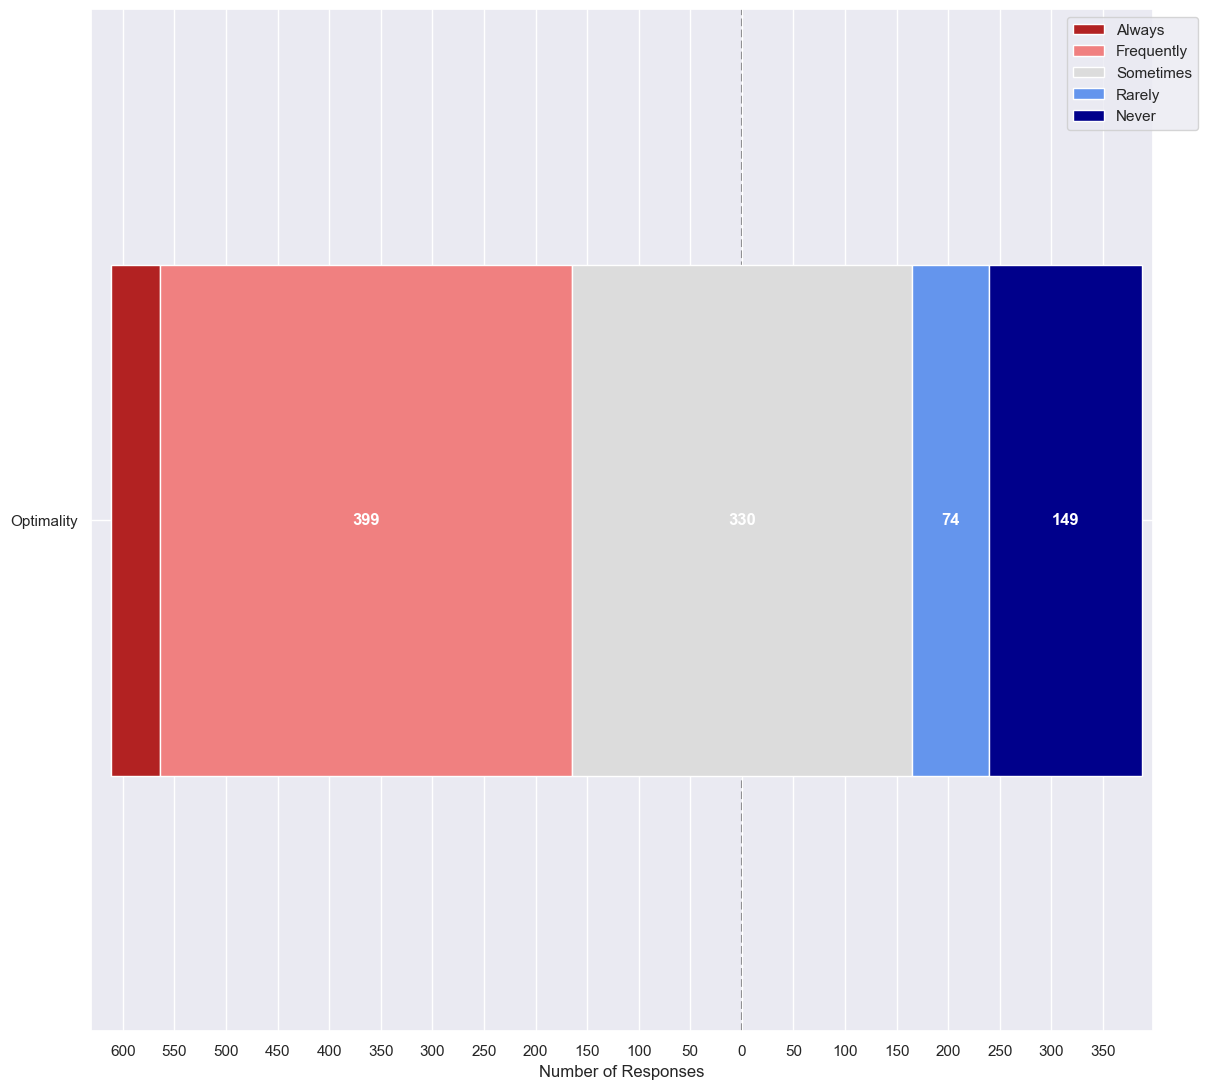

In [22]:
q6_plot.likert(labels, use_percentage=False, bar_label=True)

In [23]:
# confidence for each option
print("Option : (Lower Value, Mean, Upper Value)")
for idx in bootstrapped_dict_data:
    print(idx + ':' + str(bootstrapped_dict_data[idx]['confidence']))

print(20*"---")

Option : (Lower Value, Mean, Upper Value)
Frequently:(396.1125170671455, 399.13, 402.1474829328545)
Never:(146.63316650340852, 148.9, 151.1668334965915)
Sometimes:(327.55695546747626, 330.44, 333.32304453252374)
Rarely:(72.59888986122905, 74.24, 75.88111013877094)
Always:(46.09903732163867, 47.29, 48.48096267836133)
------------------------------------------------------------
